# Development of video using Matplotlib


In [1]:
# configuration
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pprint import pprint

In [2]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from numpy.fft import fft, ifft
from scipy.signal import convolve2d


# size of figures
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,12)
matplotlib.rcParams['figure.dpi']=200
%matplotlib inline  


number of processors: 32


## Generates a XZ field and show plots for each z

In [3]:
# Initial parameters
x0 = np.linspace(-1050 * um, 1050 * um, 1024*2)
z0 = np.linspace(-0.125*um, 4 * mm, 1024*4)
wavelength = 0.6238 * um*10

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=1000 * um, theta=0. * degrees)

In [4]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)  # insert field

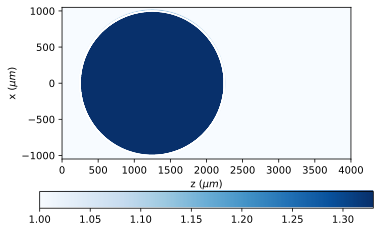

In [5]:
# insert sphere
u1.sphere(r0=(0,1.25*mm), radius=(1*mm,1*mm),refraction_index=1.33, angle=0)
u1.draw_refraction_index(scale='scaled', colorbar_kind='horizontal');

In [6]:
# BPM propagation 
u1.BPM(verbose=False)

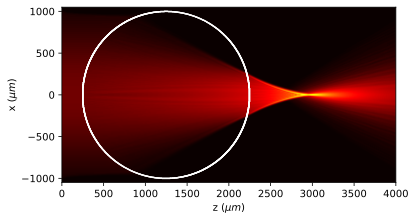

In [7]:
u1.draw(logarithm=True, scale='scaled', draw_borders=True);

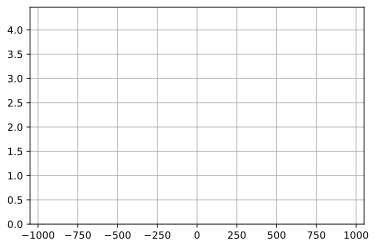

In [12]:
seconds=1.
u1.video(kind='intensity',logarithm=True,normalize=False, time_video=10 * seconds, frames_reduction=5,        
         filename='creating_video.mp4', dpi=300)

In [13]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="creating_video.mp4" type="video/mp4">
</video></div>